In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import string
#https://stackoverflow.com/questions/19726663/how-to-save-the-pandas-dataframe-series-data-as-a-figure
import six



In [2]:
tbpath = "../../fits/"
productpath = "../../postfit_derivatives/"

In [3]:
models = ["fulllinearmodel_fit_table.csv","reducedlinearmodelNegBinom_fit_table.csv",
          "reducedlinearmodelq0_fit_table.csv","reducedlinearmodelq0ctime_fit_table.csv",
         "nonlinearmodelq0ctime_fit_table.csv","nonlinearmodel_fit_table.csv"]

In [4]:
rois = []
for model in models:
    df = pd.read_csv(tbpath + model) #get rois in all tables (some may have failed)
    rois += list(df.roi.unique())

    
rois = list(set(rois))

In [5]:
theta_ = ["q"]#,"Rlast"] #need to update Rlast


dfreport = pd.DataFrame(columns=['Region', 'Model','median '+theta_[0],'CI lower','CI upper'])#,'median '+theta_[1],'CI lower','CI upper'])
k = -1
for roi in rois:
    try:
        k += 1
        model = "fulllinearmodel_fit_table.csv" 
        df = pd.read_csv(tbpath + model)
        theta = theta_[0]
        measure1 = df.loc[(df.roi==roi)&(df['quantile']==0.5),theta].values[0]
        measure2 = df.loc[(df.roi==roi)&(df['quantile']==0.025),theta].values[0]
        measure3 = df.loc[(df.roi==roi)&(df['quantile']==0.975),theta].values[0]
        x = [roi,model.split('_fit_table.csv')[0],np.round(measure1,4),np.round(measure2,4),np.round(measure3,4)]
    #         theta = theta_[1]
    #         measure1 = df.loc[(df.roi==roi)&(df['quantile']==0.5),theta].values[0]
    #         measure2 = df.loc[(df.roi==roi)&(df['quantile']==0.025),theta].values[0]
    #         measure3 = df.loc[(df.roi==roi)&(df['quantile']==0.975),theta].values[0]
    #         x += [np.round(measure1,4),np.round(measure2,4),np.round(measure3,4)]
        dfreport.loc[k] = x
    except:
        print(roi)

0.14055
0.013283978885206965


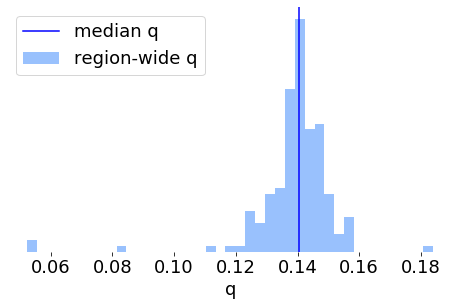

In [20]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)


def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)


f,ax = plt.subplots(1,1,figsize=(8,5))

## R0
sns.distplot(dfreport['median q'],color=sns.xkcd_rgb["bright blue"],ax=ax, kde=False, norm_hist=True, label='region-wide q')
mu = np.median(dfreport['median q'].values)
print(mu)
ax.axvline(mu,color='b',label='median q')
# print(dfreport['median q'].quantile(q=[0.025,0.5,0.975]))
print(dfreport['median q'].std())
## Rlast
# sns.distplot(dfreport['median R0'],color=c_[1],ax=ax, kde=False, norm_hist=True,label='region-wide April 15th, 2020')
# mu = np.median(dfreport['median Rlast'].values)
# print(mu)
# ax.axvline(mu,color='b',alpha=0.5,label='median April 15th, 2020')
# print(dfreport['median Rlast'].quantiles(q=[0.025,0.5,97.5]))


plt.legend(loc=2)
simpleaxis(ax)
ax.get_yaxis().set_visible(False)
ax.set_xlabel('')
plt.subplots_adjust(hspace=0.5,bottom=0.1)
ax.set_xlabel('q')
plt.subplots_adjust(hspace=0.5,bottom=0.2)
plt.savefig(productpath + 'q.png')

